## **3** Autoencoders (AEs) en MNIST
___

In [9]:
import warnings
warnings.filterwarnings('ignore')

Como hemos discutido en clases, las RBM’s y posteriormente los AE’s (redes no supervisadas) fueron un componente crucial en el desarrollo de los modelos que entre 2006 y 2010 vigorizaron el area de las redes neuronales artificiales con logros notables de desempeño en diferentes tareas de aprendizaje automatico. En esta seccion aprenderemos a utilizar el mas sencillo de estos modelos: un autoencoder o AE. Consideraremos tres aplicaciones clasicas: reduccion de dimensionalidad, denoising y pre-entrenamiento. Con este objetivo en mente, utilizaremos un dataset denominado MNIST [7]. Se trata de una colección de 70.000 imagenes de 28 × 28 pixeles correspondientes a dıgitos manuscritos (numeros entre 0 y 9). En su version tradicional, la coleccion se encuentra separada en dos subconjuntos: uno de entrenamiento de 60.000 imagenes y otro de test de 10.000 imagenes. La tarea consiste en construir un programa para que aprenda a identificar correctamente el dıgito representado en la imagen.

![alt text](uno.png "Title")

**(a)** Escriba una funcion que cargue los datos desde el repositorio de keras, normalice las imagenes de modo que los pixeles queden en [0,1], transforme las imagenes en vectores (∈ R784) y devuelva tres subconjuntos disjuntos: uno de entrenamiento, uno de validacion y uno de pruebas. Construya el conjunto de validacion utilizando los ultimos nval = 5000 casos del conjunto del entrenamiento. El conjunto de entrenamiento consistira en las primeras 60000 − nval imagenes.


In [19]:
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Datos de entrenamiento
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#Datos de Test
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Datos de validacion
x_val = x_train[:5000, :]
x_train = x_train[5000:, :]
y_val = y_train[:5000]
y_train = y_train[5000:]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_val = np_utils.to_categorical(y_val, 10)

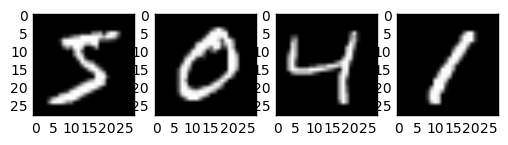

In [27]:
plt.subplot(241)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(242)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(243)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(244)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()